In [2]:
import rasterio
from rasterio.enums import Resampling
from rasterio.warp import reproject, Resampling
import numpy as np

In [7]:
# Example usage:
input_raster_path = 'out_raster/classifiy_green_6.tif'
output_raster_path = 'out_raster/morphological_green_resample_5.tif'
target_resolution = 2  # Set the desired target resolution

with rasterio.open(input_raster_path) as src:
        # Read the raster data
    raster_data = src.read(1)

        # Get the metadata of the input raster
    meta = src.meta.copy()

    # Calculate the new dimensions based on the target resolution
    new_height = int(src.height * src.res[0] / target_resolution)
    new_width = int(src.width * src.res[1] / target_resolution)

        # Perform spatial interpolation using bilinear resampling
    interpolated_data = np.empty((new_height, new_width), dtype=raster_data.dtype)
    rasterio.warp.reproject(
            source=raster_data,
            destination=interpolated_data,
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=src.transform * src.transform.scale(
                (src.width / new_width), (src.height / new_height)
            ),
            dst_crs=src.crs,
            resampling=Resampling.bilinear
    )

        # Update metadata with new dimensions and resolution
    meta.update({
            'width': new_width,
            'height': new_height,
            'transform': src.transform * src.transform.scale(
                (src.width / new_width), (src.height / new_height)
            ),
            'res': (target_resolution, target_resolution)
        })



In [8]:
# Write the interpolated raster to the output file
with rasterio.open(output_raster_path, 'w', **meta) as dst:
    dst.write(interpolated_data, 1)

In [ ]:
#APPLY FILTERS

In [170]:
import rasterio
from rasterio.windows import Window
from rasterio.features import rasterize
from scipy.ndimage import uniform_filter
import matplotlib.pyplot as plt
from skimage import filters
import numpy as np
from skimage.filters import gaussian, median
import cv2

In [92]:
input_raster = 'out_raster/morphological_green_resample_5.tif'
output_raster = 'out_rater/filters/filtered_green_1.tif'

In [93]:
with rasterio.open(input_raster) as src:
    profile = src.profile
    meta = src.meta
    filtered_data = uniform_filter(src.read(1), size=(2,2))

(array([3.389e+03, 5.700e+01, 3.000e+01, 2.500e+01, 1.900e+01, 2.300e+01,
        3.000e+01, 1.800e+01, 1.200e+01, 1.400e+01, 1.500e+01, 1.800e+01,
        1.500e+01, 1.100e+01, 8.000e+00, 1.800e+01, 1.500e+01, 1.300e+01,
        1.300e+01, 8.000e+00, 1.400e+01, 2.100e+01, 1.000e+01, 1.000e+01,
        1.900e+01, 1.300e+01, 2.000e+01, 1.800e+01, 1.700e+01, 1.500e+01,
        1.800e+01, 1.700e+01, 1.600e+01, 2.000e+01, 2.200e+01, 2.700e+01,
        3.200e+01, 3.200e+01, 3.200e+01, 1.900e+01, 4.300e+01, 2.300e+01,
        3.700e+01, 4.800e+01, 4.200e+01, 5.600e+01, 5.000e+01, 5.400e+01,
        5.600e+01, 6.500e+01, 6.200e+01, 6.100e+01, 8.200e+01, 7.800e+01,
        7.800e+01, 7.500e+01, 7.700e+01, 8.700e+01, 9.500e+01, 9.200e+01,
        9.800e+01, 1.110e+02, 1.040e+02, 1.040e+02, 1.040e+02, 1.040e+02,
        9.900e+01, 1.060e+02, 1.030e+02, 9.300e+01, 9.700e+01, 8.700e+01,
        9.400e+01, 9.900e+01, 8.100e+01, 6.800e+01, 9.600e+01, 7.400e+01,
        7.200e+01, 6.000e+01, 6.500e+0

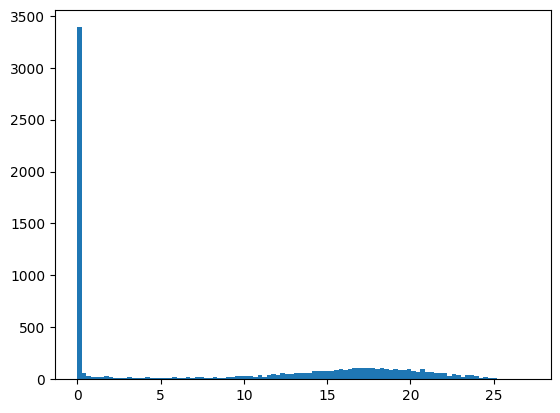

In [16]:
plt.hist(filtered_data.flatten(), bins=100)

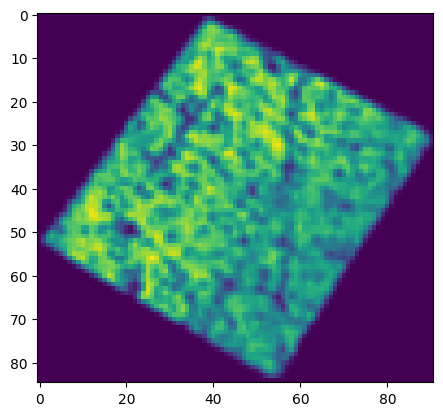

In [33]:
plt.imshow(filtered_data)

In [200]:
# Additional Functions to clean raster data

# Apply smooth edges
def smooth_edges(filtered_data, edge_detection_method='sobel'):
    edges = filters.sobel(filtered_data)
    smooth_edges = filters.gaussian(edges, sigma=0.5)
    return smooth_edges

# Reduce noise
def reduce_noise(filtered_data, threshold=5):
    std = np.std(filtered_data)
    noise_mask = np.abs(filtered_data - np.mean(filtered_data)) > std * threshold
    noise_reduced_data = np.where(noise_mask, np.mean(filtered_data), filtered_data)
    return noise_reduced_data

def reduce_noise_median(filtered_data):
    return median(filtered_data)

def smooth_edge_gaus(filtered_data, sigma=0.01):
    return gaussian(filtered_data, sigma=sigma)

def smooth_edges_cv2(filtered_data, sigma_s=1.5, sigma_r=0.5):
    return cv2.bilateralFilter(filtered_data, -1, sigma_s, sigma_r)

def average_edge(filtered_data):
    kernel = np.ones((2,2), np.float32)/25
    return cv2.filter2D(filtered_data, -1, kernel)

def emphasize_patterns(filtered_data, alpha=1, beta=0.5):
    return aplha * filtered_image - beta
    

In [57]:
edge_smooth_data = smooth_edges(filtered_data)

(array([3.134e+03, 5.900e+01, 3.500e+01, 2.800e+01, 3.000e+01, 3.000e+01,
        3.500e+01, 4.500e+01, 5.200e+01, 7.000e+01, 1.160e+02, 1.070e+02,
        1.090e+02, 1.150e+02, 1.110e+02, 1.260e+02, 1.110e+02, 1.300e+02,
        1.220e+02, 1.410e+02, 1.410e+02, 1.480e+02, 1.370e+02, 1.230e+02,
        1.340e+02, 1.110e+02, 1.130e+02, 1.230e+02, 1.050e+02, 9.000e+01,
        1.020e+02, 8.400e+01, 1.080e+02, 8.500e+01, 8.700e+01, 8.000e+01,
        7.200e+01, 7.400e+01, 6.100e+01, 6.500e+01, 4.600e+01, 6.000e+01,
        4.800e+01, 4.000e+01, 5.300e+01, 4.200e+01, 4.100e+01, 3.000e+01,
        4.300e+01, 3.000e+01, 2.800e+01, 2.600e+01, 3.300e+01, 2.700e+01,
        2.300e+01, 2.800e+01, 3.100e+01, 1.800e+01, 2.400e+01, 2.800e+01,
        1.400e+01, 1.800e+01, 2.600e+01, 1.700e+01, 1.600e+01, 1.600e+01,
        1.700e+01, 1.400e+01, 1.300e+01, 1.300e+01, 6.000e+00, 7.000e+00,
        8.000e+00, 4.000e+00, 8.000e+00, 8.000e+00, 8.000e+00, 7.000e+00,
        1.200e+01, 9.000e+00, 7.000e+0

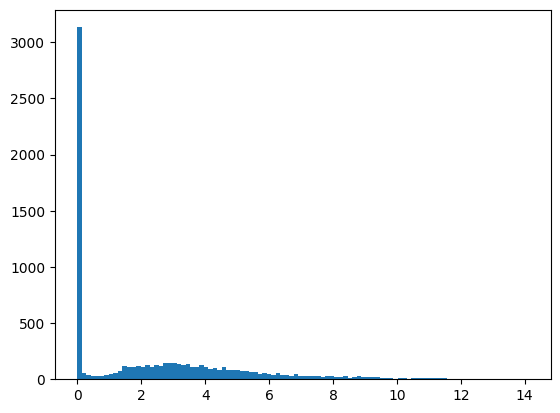

In [58]:
plt.hist(edge_smooth_data.flatten(), bins=100)

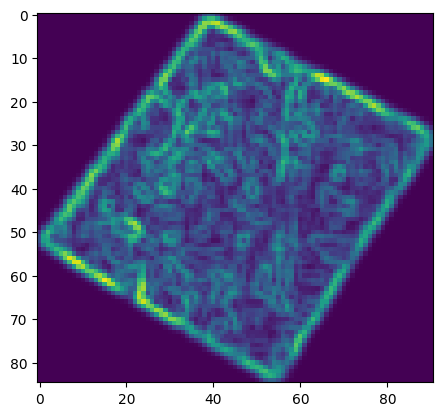

In [59]:
plt.imshow(edge_smooth_data)

In [201]:
reduce_noise = reduce_noise(filtered_data)
reduce_noise_median = reduce_noise_median(filtered_data)
smooth_edge_gaus = smooth_edges_cv2(filtered_data)
avg_edge = average_edge(filtered_data)

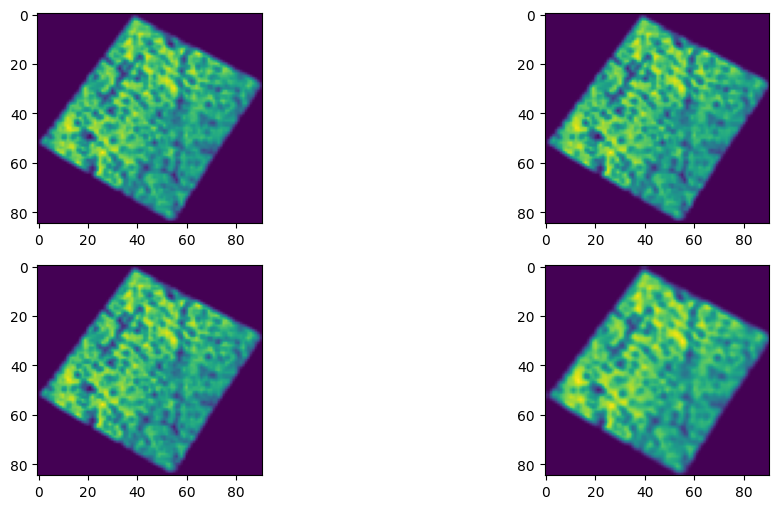

In [202]:
fig, ax = plt.subplots(2,2,figsize=(12,6))
ax[0,0].imshow(reduce_noise)
ax[0,1].imshow(smooth_edge_gaus)
ax[1,0].imshow(filtered_data)
ax[1,1].imshow(avg_edge)

In [193]:
#Export to a new raster
meta.update(
    dtype=rasterio.float32,  # Update the data type to match the VARI data
    count=1,  # Only one band for VARI
    compress='lzw',  # You can choose a compression method if needed
    tiled=False,
    blockysize=1,
    nodata=0.0
)

In [203]:
# Create the new raster TIF file-1
with rasterio.open('out_raster/filters/green_average_filter_3.tif', 'w', **meta) as dst:
    dst.write(avg_edge, 1)